<div style='display: flex;'>
    <h1>Machine Learning on Asteroid dataset</h1>
    <img src='asteroid.jpeg' height='150px' width='100px'/>
</div>

<div style="border: 1px dashed black;
            padding: 10px 10px 10px 10px;">
    <h4>Machine Learning general workflow :</h4>
    <ol>
        <li><a href='#part1'>Defining a quantitative objective</a></li>
        <li><a href='#part2'>EDA (Exploratory Data Analysis):</a> Understanding as much as possible the data in order to define modelling strategy.
        <ul>
            <li><a href='#part2.1'><span style="color: blue;">Number of rows and columns</span></a></li>
            <li><a href='#part2.2'><span style="color: blue;">Identifying the target</span></a></li>
            <li><a href='#part2.3'><span style="color: blue;">Variables types</span></a></li>
            <li><a href='#part2.4'><span style="color: blue;">Identification of missing values</span></a></li>
            <li><a href='#part2.5'><span style="color: red;">Visualizing the target</span></a></li>
            <li><a href='#part2.6'><span style="color: red;">Understanding all the variables</span></a></li>
            <li><a href='#part2.7'><span style="color: red;">Visualizing relationships between the target and the features</span></li>
            <li><a href='#part2.8'><span style="color: red;">Identifying outliers</span></a></li>
        </ul></li>
        <li><a href='#part3'>Pre-Processing: </a>Transforming the data in order to have a proper input for modelling.
        <ul>
            <li>Splitting data into Train set and Test set</li>
            <li>Removing/Replacing NA</li>
            <li>Encoding variables</li>
            <li>Removing outliers which drop down model performances</li>
            <li>Feature selection</li>
            <li>Feature engineering</li>
            <li>Feature scaling</li>
        </ul></li>
        <li><a href='#part4'>Modelling: </a> Giving answer to the former objective.
        <ul>
            <li>Defining a scoring function</li>
            <li>Training of the differents models</li>
            <li>Optimization with GridSearchCV</li>
            <li>(Optional) Analysis of errors and go back to EDA/Pre processing</li>
            <li>Learning curve and decision</li>
        </ul></li>
    </ol>
    <p>(<span style="color: blue;">*="front-end" part</span>, <br/>
        <span style="color: red;">*="back-end" part</span>)</p>
          <a href='https://scikit-learn.org/stable/index.html#' target='_blank'>See Scikit-Learn documentation</a>
        <br/>
        <a href='https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html' target='_blank'>See Scikit-Learn scheme for choosing the right model</a>
        <br/>
        <a href='https://www.datacourses.com/classification-model-evaluation-metrics-in-scikit-learn-924/', target='_blank'>See external ressouces about classification metrics</a>
    </p>
</div>

Data can be found at <a href='https://www.kaggle.com/sakhawat18/asteroid-dataset/' target='_blank'>https://www.kaggle.com/sakhawat18/asteroid-dataset/</a>

<a id='part1'><h2>1) Objective</h2></a>

Classify asteroid in different harmfulness classes. Huge class disequelibrium so Accuracy seems not to be the better choice for a metrics.</br>
The <strong>Recall</strong> (Sensibility) score is a better metrics, because we want to prioritize the ability to detect an harmful asteroid.

<a id='part2'><h2>2) EDA</h2></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

SEED = np.random.seed(seed=777)
PATH = '/media/anthony/USOPP/Kaggle/asteroid.csv'

<h3 style='text-decoration: underline;'>Number of rows and columns</h3>

In [2]:
asteroid = pd.read_csv(PATH)

asteroid.rename(columns={"H":"magnitude", "e":"eccentricity", "a":"semi_major_axis", "q":"perihelion",
                         "i":"inclination", "n":"mean_motion", "tp":"perihelion_time", 
                         "per":"period_day"}, inplace=True)

asteroid.drop(columns=['diameter_sigma', 'epoch_mjd', 'epoch_cal', 'equinox', 'epoch',
                       'tp_cal', "per_y", "moid_ld", 'sigma_e', 'sigma_a', 'sigma_q', 
                       'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 
                       'sigma_tp', 'sigma_per', 'id', 'full_name', 'name', 'spkid', 
                       'orbit_id', 'prefix', 'pdes'], inplace=True)
print(f'{asteroid.shape[0]} rows x {asteroid.shape[1]} columns')
asteroid.head(n=10)

/media/anthony/USOPP/conda/IA/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


958524 rows x 19 columns


,neo,pha,magnitude,diameter,albedo,eccentricity,semi_major_axis,perihelion,inclination,om,w,ma,ad,mean_motion,perihelion_time,period_day,moid,class,rms
0,N,N,3.40,939.400,0.0900,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,1683.145703,1.594780,MBA,0.43301
1,N,N,4.20,545.000,0.1010,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,1687.410992,1.234290,MBA,0.35936
2,N,N,5.33,246.596,0.2140,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,1592.013769,1.034290,MBA,0.33848
3,N,N,3.00,525.400,0.4228,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,1325.432763,1.139480,MBA,0.39980
4,N,N,6.90,106.699,0.2740,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,1508.414421,1.095750,MBA,0.52191
5,N,N,5.80,185.180,0.2679,0.203219,2.424533,1.931822,14.739653,138.643432,239.736273,190.686496,2.917243,0.261073,2.459649e+06,1378.924506,0.973673,MBA,0.41032
6,N,N,5.60,199.830,0.2766,0.230145,2.387375,1.837933,5.521598,259.563943,145.201545,247.425811,2.936818,0.267192,2.459422e+06,1347.347071,0.850693,MBA,0.38128
7,N,N,6.50,147.491,0.2260,0.155833,2.201415,1.858362,5.889081,110.876524,285.458915,315.318013,2.544467,0.301753,2.459149e+06,1193.029574,0.875980,MBA,0.54186
8,N,N,6.30,190.000,0.1180,0.123300,2.386189,2.091972,5.576494,68.909459,6.337325,23.912204,2.680407,0.267391,2.458911e+06,1346.343282,1.107110,MBA,0.44895
9,N,N,5.50,407.120,0.0717,0.112117,3.142435,2.790114,3.831786,283.198444,312.412932,222.850543,3.494757,0.176931,2.459776e+06,2034.688644,1.780300,MBA,0.53434


In [71]:
#asteroid = asteroid.astype(dtype={'pdes':str})

<h3 style='text-decoration: underline;'>Identification of the target</h3>

The target is the <strong>pha</strong> flag variable (PHA = Potentially Hazardous Asteroid).

<h3 style='text-decoration: underline;'>Variables types</h3>

float64    16
object      3
dtype: int64


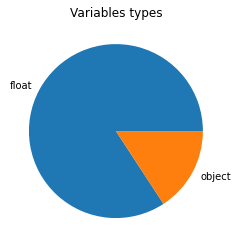

In [3]:
plt.pie(asteroid.dtypes.value_counts(), labels=['float', 'object'])
plt.title('Variables types')
print(asteroid.dtypes.value_counts())

Most of the features are quantitaive, which is a good source of information.

<h3 style='text-decoration: underline;'>Identification of missing values</h3>

In [4]:
(asteroid.isna().sum(axis=0)/asteroid.shape[0]).sort_values(ascending=True)

om                 0.000000
perihelion_time    0.000000
mean_motion        0.000000
w                  0.000000
eccentricity       0.000000
semi_major_axis    0.000000
perihelion         0.000000
inclination        0.000000
class              0.000000
ma                 0.000001
rms                0.000002
ad                 0.000004
period_day         0.000004
neo                0.000004
magnitude          0.006534
pha                0.020783
moid               0.020783
diameter           0.857897
albedo             0.859051
dtype: float64

We will drop the 'prefix' column (99.99% of missing values) and also entry whom target variable has missing value.</br>
Too much entry for a heatmap of missing data localization.

In [5]:
asteroid = asteroid.iloc[:, :][pd.notnull(asteroid.pha)]
print(f'{asteroid.shape[0]} lines after filtering')

938603 lines after filtering


<h3 style='text-decoration: underline;'>Visualizing the target</h3>

N    936537
Y      2066
Name: pha, dtype: int64


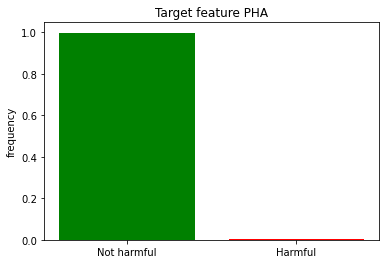

In [6]:
pd.unique(asteroid.pha)
plt.bar(x=['Not harmful', 'Harmful'], 
        height=asteroid.pha.value_counts().values/asteroid.shape[0],
        color=['green', 'red'])
plt.ylabel('frequency')
plt.title('Target feature PHA')
print(asteroid.pha.value_counts())

We see a huge class-disequelibrium, so the accuracy metrics seems not to be a good choice.

<h3 style='text-decoration : underline;'>Understanding of the features</h3>

In [7]:
#useful for visualization
asteroid_sample = asteroid.sample(n=10000, replace=False, axis=0, random_state=SEED)

<h4>Quantitatives features</h4>

In [25]:
quanti_features = list(asteroid.select_dtypes(include=['int', 'float64']).columns)
print(len(quanti_features))
print(quanti_features)
asteroid.describe()

16
['magnitude', 'diameter', 'albedo', 'eccentricity', 'semi_major_axis', 'perihelion', 'inclination', 'om', 'w', 'ma', 'ad', 'mean_motion', 'perihelion_time', 'period_day', 'moid', 'rms']


,magnitude,diameter,albedo,eccentricity,semi_major_axis,perihelion,inclination,om,w,ma,ad,mean_motion,perihelion_time,period_day,moid,rms
count,932341.000000,136209.000000,135103.000000,938603.000000,938603.000000,938603.000000,938603.000000,938603.000000,938603.000000,938602.000000,938599.000000,9.386030e+05,9.386030e+05,9.385990e+05,9.386030e+05,9.386020e+05
mean,16.889969,5.506429,0.130627,0.156146,2.906752,2.397725,9.048065,168.449643,181.383329,177.198278,3.463186,2.367287e-01,2.458857e+06,5.157181e+03,1.415162e+00,5.672894e-01
std,1.801386,9.425164,0.110323,0.093006,40.137750,2.159374,6.646721,102.874452,103.907129,105.859245,72.525094,7.996385e-02,1.593716e+03,2.333335e+06,2.156731e+00,2.774323e+00
min,-1.100000,0.002500,0.001000,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,-70.703676,0.653773,1.608247e-07,2.283183e+06,1.511918e+02,4.544120e-07,3.292200e-11
25%,16.000000,2.780000,0.053000,0.092064,2.388114,1.971656,4.154593,80.565903,91.487831,83.607833,2.781941,1.894353e-01,2.458564e+06,1.347974e+03,9.797020e-01,5.218000e-01
50%,16.900000,3.972000,0.079000,0.144865,2.647342,2.226687,7.404507,159.897335,182.365333,175.280884,3.047348,2.288168e-01,2.458946e+06,1.573311e+03,1.240850e+00,5.680100e-01
75%,17.700000,5.765000,0.190000,0.200598,3.002579,2.579723,12.398180,252.182070,271.554104,269.853803,3.365392,2.670676e-01,2.459362e+06,1.900379e+03,1.593370e+00,6.151800e-01
max,33.200000,939.400000,1.000000,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,491.618014,66972.796064,2.381082e+00,2.546362e+06,2.238462e+09,7.947660e+01,2.686600e+03


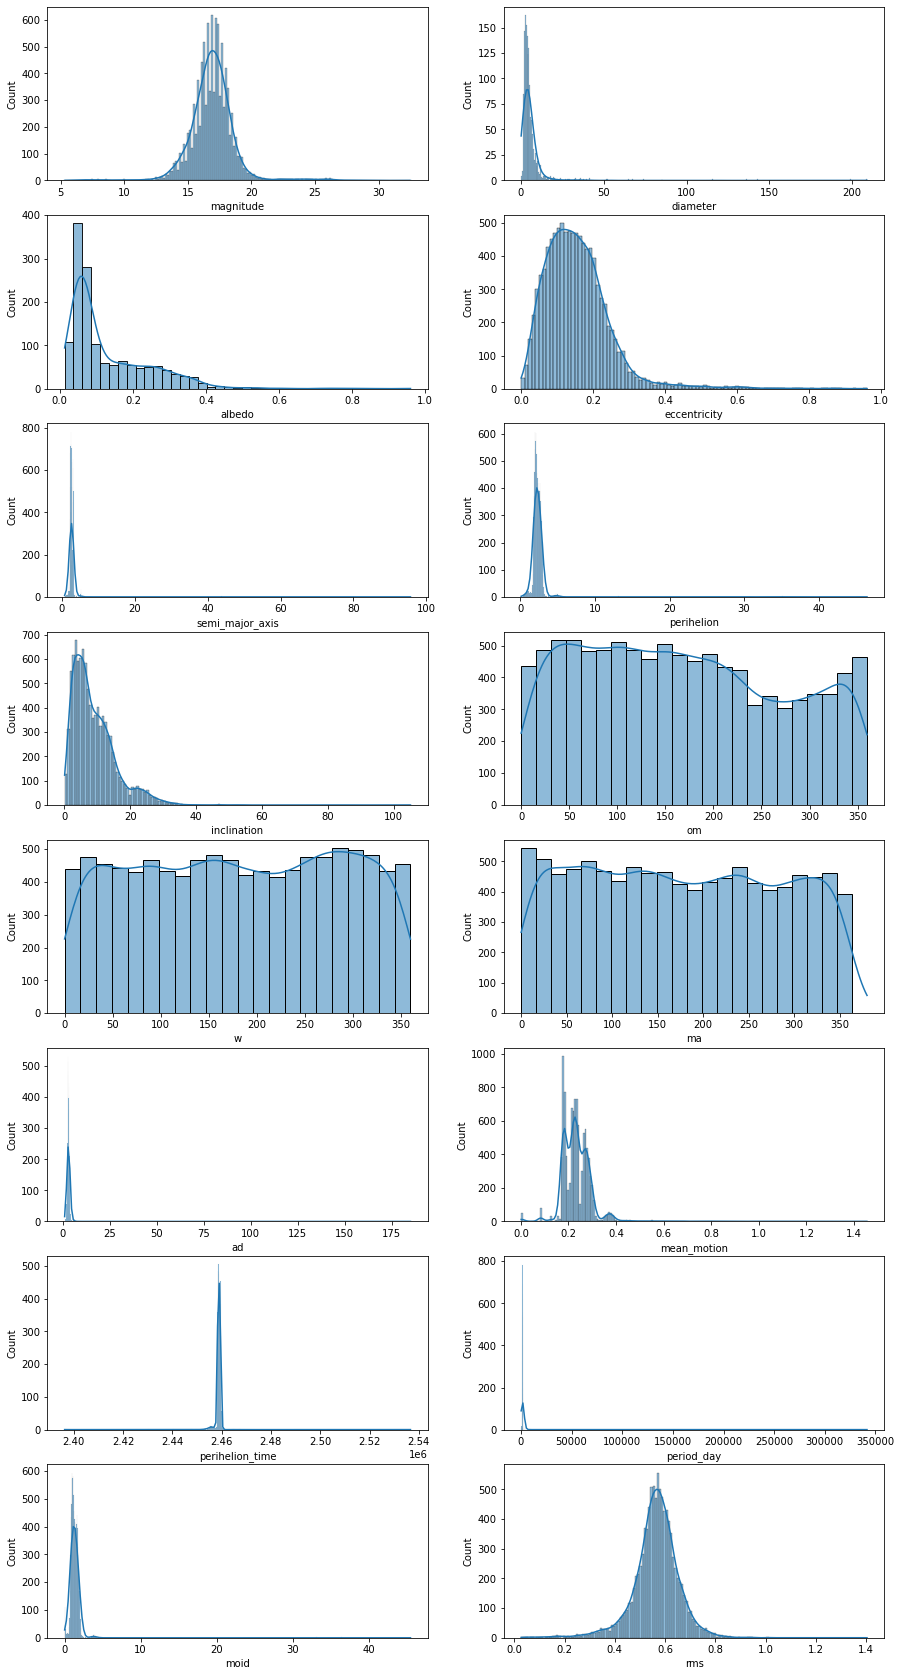

In [76]:
pos = 1
figure = plt.figure(figsize=(15, 30))

for i in range(1, 9): #8rows
    for j in range(1, 3): #2rows
        ax = figure.add_subplot(8, 2, pos)
        sns.histplot(ax=ax, data=asteroid_sample[quanti_features[pos-1]], kde=True)
        pos += 1

'magnitude' and 'rms' features seemed to have a normal distribution. 

Text(0.5, 1.0, 'Rms')

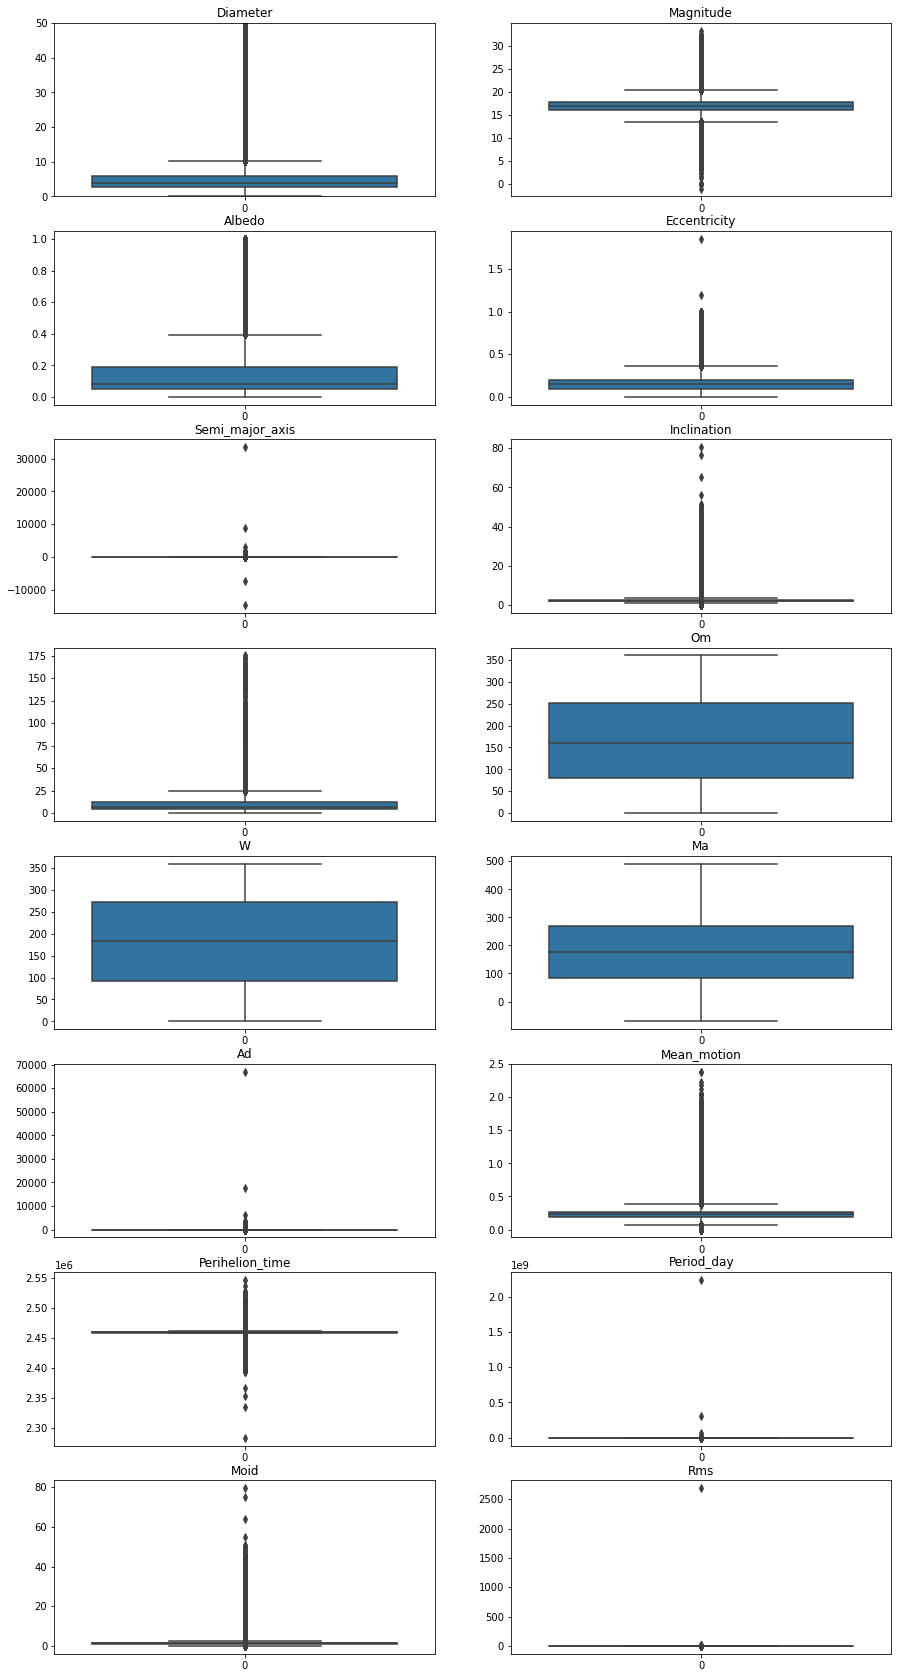

In [54]:
figure = plt.figure(figsize=(15, 30))
diameter = figure.add_subplot(8, 2, 1)
sns.boxplot(ax=diameter, data=asteroid['diameter'])
diameter.set_ylim(0, 50)
diameter.set_title('Diameter')

magnitude = figure.add_subplot(8, 2, 2)
sns.boxplot(ax=magnitude, data=asteroid['magnitude'])
magnitude.set_title('Magnitude')

albedo = figure.add_subplot(8, 2, 3)
sns.boxplot(ax=albedo, data=asteroid['albedo'])
albedo.set_title('Albedo')

eccentricity = figure.add_subplot(8, 2, 4)
sns.boxplot(ax=eccentricity, data=asteroid['eccentricity'])
eccentricity.set_title('Eccentricity')

semi_major_axis = figure.add_subplot(8, 2, 5)
sns.boxplot(ax=semi_major_axis, data=asteroid['semi_major_axis'])
semi_major_axis.set_title('Semi_major_axis')

perihelion = figure.add_subplot(8, 2, 6)
sns.boxplot(ax=perihelion, data=asteroid['perihelion'])
perihelion.set_title('Perihelion')

inclination = figure.add_subplot(8, 2, 7)
sns.boxplot(ax=inclination, data=asteroid['inclination'])
perihelion.set_title('Inclination')

om = figure.add_subplot(8, 2, 8)
sns.boxplot(ax=om, data=asteroid['om'])
om.set_title('Om')

w = figure.add_subplot(8, 2, 9)
sns.boxplot(ax=w, data=asteroid['w'])
w.set_title('W')

ma = figure.add_subplot(8, 2, 10)
sns.boxplot(ax=ma, data=asteroid['ma'])
ma.set_title('Ma')

ad = figure.add_subplot(8, 2, 11)
sns.boxplot(ax=ad, data=asteroid['ad'])
ad.set_title('Ad')

mean_motion = figure.add_subplot(8, 2, 12)
sns.boxplot(ax=mean_motion, data=asteroid['mean_motion'])
mean_motion.set_title('Mean_motion')

perihelion_time = figure.add_subplot(8, 2, 13)
sns.boxplot(ax=perihelion_time, data=asteroid['perihelion_time'])
perihelion_time.set_title('Perihelion_time')

period_day = figure.add_subplot(8, 2, 14)
sns.boxplot(ax=period_day, data=asteroid['period_day'])
period_day.set_title('Period_day')

moid = figure.add_subplot(8, 2, 15)
sns.boxplot(ax=moid, data=asteroid['moid'])
moid.set_title('Moid')

rms = figure.add_subplot(8, 2, 16)
sns.boxplot(ax=rms, data=asteroid['rms'])
rms.set_title('Rms')

We see a lot of outlier for most of the features.

<h4>Qualitative features</h4>

In [9]:
quali_features = list(asteroid.select_dtypes(include=['object']).columns)
print(len(quali_features))
print(quali_features)

3
['neo', 'pha', 'class']


Text(0.5, 1.0, 'Asteroid class')

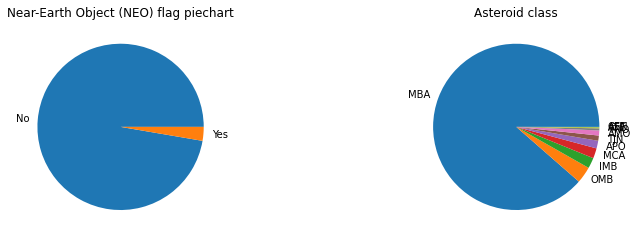

In [10]:
figure = plt.figure(figsize=(13, 13))

neo = figure.add_subplot(3, 2, 1)
neo.pie(x=asteroid_sample['neo'].value_counts(dropna=False), labels=['No', 'Yes'])
neo.set_title('Near-Earth Object (NEO) flag piechart')

ast_class = figure.add_subplot(3, 2, 2)
ast_class.pie(x=asteroid_sample['class'].value_counts(dropna=False),
              labels=asteroid_sample['class'].value_counts().index)
ast_class.set_title('Asteroid class')

<h4>Relationships between quantitatives features</h4>

Text(0.5, 1.0, 'Heatmap of Pearson correlation coefficient between asteroid features')

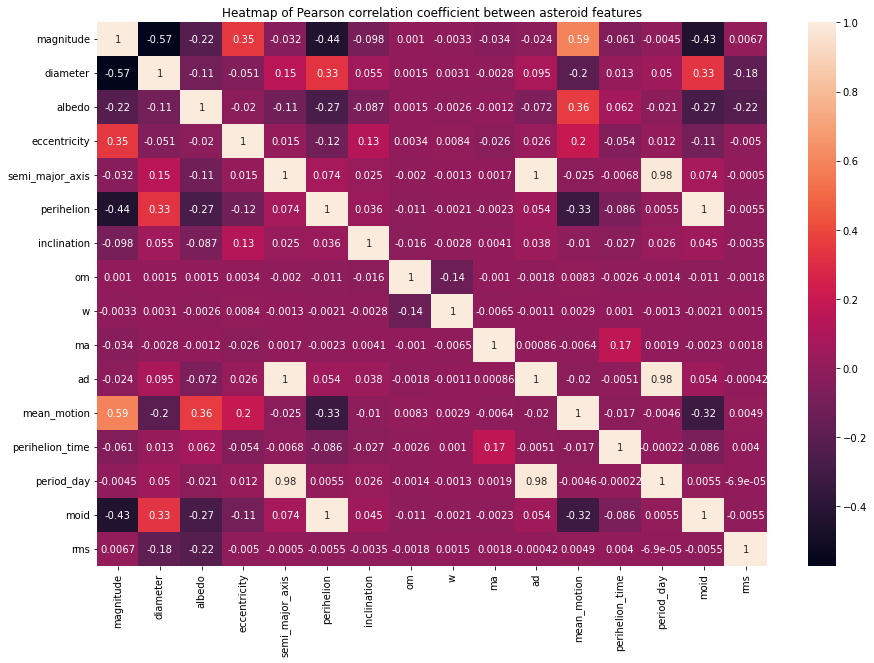

In [79]:
figure = plt.figure(figsize=(15, 10))
ax = figure.add_subplot(1,1,1)
sns.heatmap(ax=ax, data=asteroid.corr(method="pearson"), annot=True)
ax.set_title('Heatmap of Pearson correlation coefficient between asteroid features')

<div style='display: flex;
            flex-direction: row;
            justify-content: space-between'>
    <div style='border-right: 1px black dotted;
                padding: 10px 30px 10px 10px;'>
        <strong>Strong positive correlation between:</strong>
        <ul>
            <li>'ad' and 'period_day'</li>
            <li>'semi_major_axis' and 'period_day'</li>
            <li>'semi_major_axis' and 'ad'</li>
            <li>'semi_major_axis' and 'moid'</li>
        </ul>
        Thus between period-related features.
    </div>
    <div style='padding: 10px 10px 10px 30px;'>
        <strong>Strong negative correlation between:</strong>
        <ul>
            <li>'magnitude' and 'diameter'</li>
        </ul>
        Thus between two shape-related features.
    </div>
</div>

Test hypothesis :
\begin{equation}
    H0: \rho = 0
    \newline
    H1: \rho \neq 0
\end{equation}

From <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html' traget='_blank'>Scipy documentation</a> : <span style='font-style: italic;'>"The calculation of the p-value relies on the assumption that each dataset is normally distributed."</span> </br>That is because the test is a Student T test.
In the case of 'magnitude' and 'diameter' it seems ok.

In [11]:
#we have to replace/remove NA values for the test
##median seems to be a good choice because of the extreme distribution of some features
asteroid_for_test = asteroid.fillna({'magnitude':np.nanmedian(asteroid['magnitude']),
                                     'diameter':np.nanmedian(asteroid['diameter'])})

<h5>Between 'Magnitude' and 'Diameter' :</h5>

In [12]:
test = pearsonr(asteroid_for_test['magnitude'], asteroid_for_test['diameter'])
print('Pvalue of {} for the Pearson corr coeff of {:3f} between "Magnitude" and "Diameter" features'.format(test[1], test[0]))

Pvalue of 0.0 for the Pearson corr coeff of -0.225773 between "Magnitude" and "Diameter" features


It seems there is a significative negative correlation between the Magnitude and the Diameter of an Asteroid. But maybe it will be a good idea to use statitic in order the prove the gaussian aspect of theses two features.
</br>For non-normally distributed features, we should use non-parametric test instead of Student T test (Kruskall-Wallis?).

<h3>Relationships between the target and the features</h3>

In [14]:
harmful = asteroid.iloc[:, :][asteroid.pha == 'Y']
safe = asteroid_sample.iloc[:, :][asteroid.pha == 'N']

print(f"Harmful: {harmful.shape}")
print(f"Safe: {safe.shape}")

Harmful: (2066, 19)
Safe: (9979, 19)


/media/anthony/USOPP/conda/IA/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<h4>Physical features :</h4>

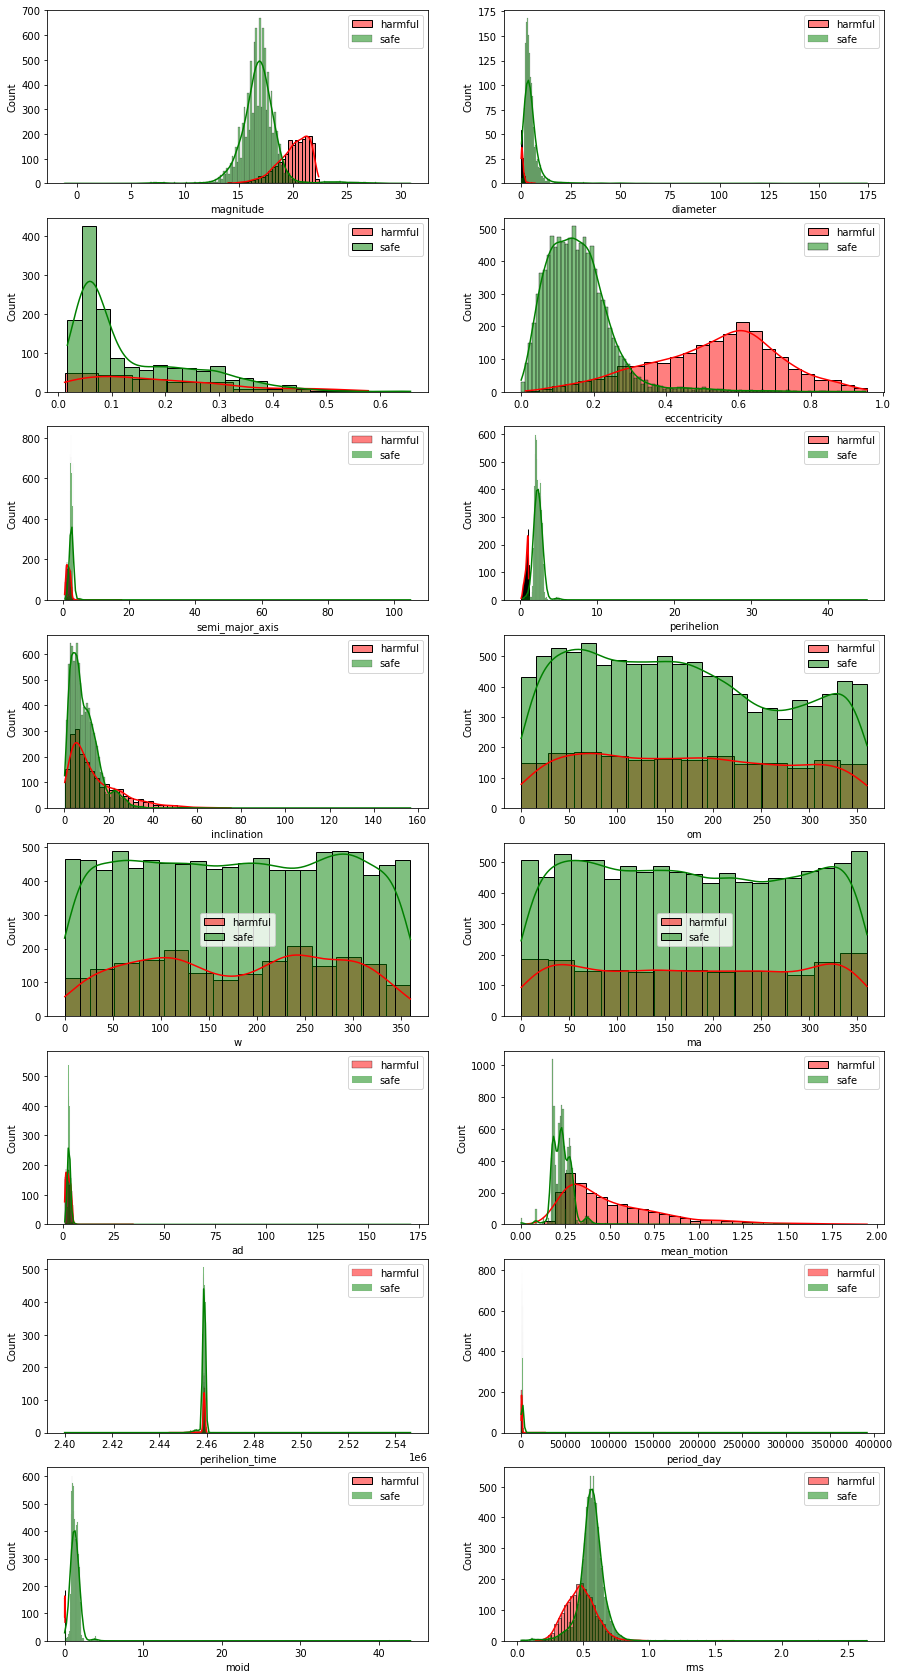

In [15]:
pos = 1
figure = plt.figure(figsize=(15, 30))

for i in range(1, 9): #8rows
    for j in range(1, 3): #2rows
        ax = figure.add_subplot(8, 2, pos)
        sns.histplot(ax=ax, data=harmful[quanti_features[pos-1]], kde=True, color='r', label='harmful')
        sns.histplot(ax=ax, data=safe[quanti_features[pos-1]], kde=True, color='g', label='safe')
        plt.legend()

        pos += 1

We can observe that harmful asteroid seem to have:
<ul>
    <li>An higher eccentricity</li>
    <li>An higher magnitude</li>
    <li>A more scaterred mean motion distribution</li>
    <li>A lower rms</li>
</ul>
In order to confirm, we need non-parametric test of mean comparison. <strong>We should prioritize theses features, but how ?</strong>

<div style='border: 1px dashed red;'></div>

<h3 style='color: red;'>Conclusion :</h3>
<ul style='color: red;'>
    <li>There are some correlation between features</li>
    <li>There are some difference in distribution for some features, between harmful and safe asteroids.</li>
</ul>

<div style='border: 1px dashed red;'></div>

<h2>3) Preprocessing</h2>

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, StandardScaler

<h3>Splitting into train and test set</h3>

In [17]:
Y = asteroid['pha']
Y = Y.replace({'N':0, 'Y':1}) #or use LabelEncoder()
X = asteroid.drop(axis=1, columns=['pha'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=SEED, shuffle=True, 
                                                   test_size=0.3, train_size=0.7)

print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'Y_train : {Y_train.shape}')
print(f'Y_test : {Y_test.shape}')

X_train : (657022, 18)
X_test : (281581, 18)
Y_train : (657022,)
Y_test : (281581,)


<h3>Removing/Replacing missing data</h3>
(See <a href='https://scikit-learn.org/stable/modules/impute.html#impute' target='_blank'>https://scikit-learn.org/stable/modules/impute.html#impute</a>)

Text(0.5, 1.0, 'Albedo boxplot')

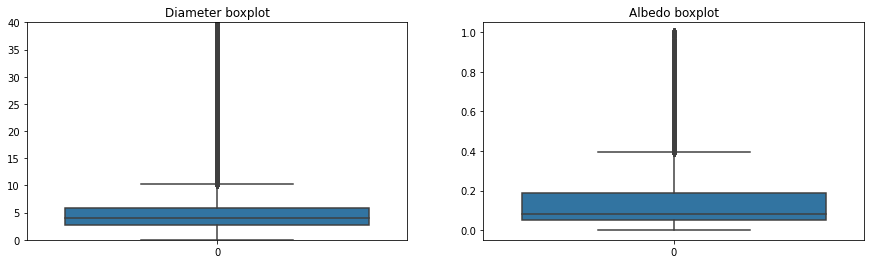

In [23]:
figure = plt.figure(figsize=(15, 4))
diam = figure.add_subplot(1, 2, 1)
sns.boxplot(data=asteroid.diameter, ax=diam, orient='v')
diam.set_ylim(0, 40)
diam.set_title('Diameter boxplot')

alb = figure.add_subplot(1, 2, 2)
sns.boxplot(data=asteroid.albedo, ax=alb, orient='v')
alb.set_title('Albedo boxplot')

In [19]:
#Imputation strategy is different according to the features type (quanti or quali)
quanti_features = X_train.select_dtypes(include=['int', 'float64']).columns
print(quanti_features)

quali_features = X_train.select_dtypes(include=['object']).columns
print(quali_features)

quanti_imp = SimpleImputer(strategy='median')
quali_imp = SimpleImputer(strategy='most_frequent')

Index(['magnitude', 'diameter', 'albedo', 'eccentricity', 'semi_major_axis',
       'perihelion', 'inclination', 'om', 'w', 'ma', 'ad', 'mean_motion',
       'perihelion_time', 'period_day', 'moid', 'rms'],
      dtype='object')
Index(['neo', 'class'], dtype='object')


Two quantitative features have a large amount of missing data ('diameter' and 'albedo'), and diameter feature has a high standard deviation, thus forcing us to consider the median as a good imputation strategy.

<h3>Encoding features</h3>
    (See <a href='https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features' target='_blank'>https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features</a>)

In [20]:
for feature in list(quali_features):
    print(feature, pd.unique(asteroid[feature]))

neo ['N' 'Y' nan]
class ['MBA' 'OMB' 'MCA' 'AMO' 'IMB' 'TJN' 'CEN' 'APO' 'ATE' 'AST' 'TNO' 'IEO'
 'HYA']


In [21]:
encoder = OrdinalEncoder()

<h3>Feature Scaling</h3>
(See <a href='https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling' target='_blank'>https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling</a>)

In [22]:
quanti_scaler = RobustScaler() #numeric features have a hich variability

<h2>4) Modelling</h2>

In [97]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV, StratifiedKFold

According to the scheme on scikit-learn documentation, the best model to use, considering the amount of data is a SGD classifier.

In [98]:
numeric_pipeline = make_pipeline(
    quanti_imp,
    quanti_scaler)
    
categorical_pipeline = make_pipeline(
    quali_imp,
    encoder)

preprocessor = make_column_transformer(
    (numeric_pipeline, quanti_features),
    (categorical_pipeline, quali_features))

main_pipeline = make_pipeline(
    preprocessor,
    SGDClassifier())

print(main_pipeline)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['magnitude', 'diameter', 'albedo', 'eccentricity', 'semi_major_axis',
       'perihelion', 'inclination', 'om', 'w', 'ma', 'ad', 'mean_motion',
       'perihelion_time', 'period_day', 'moid', 'rms'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                  

In [99]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
param_grid = {
    "sgdclassifier__alpha":[0.01, 0.001, 0.0001],
    "sgdclassifier__penalty":['l1','l2', 'elasticnet'],
}

grid = GridSearchCV(main_pipeline,
                   param_grid=param_grid,
                   scoring='recall',
                   cv=cv)

In [100]:
grid.fit(X=X_train, y=Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['magnitude', 'diameter', 'albedo', 'eccentricity', 'semi_major_axis',
       'perihelion', 'inclinat...
       'perihelion_time', 'period_day', 'moid', 'rms'],
      dtype='object')),
                                                                        ('pi

In [101]:
print(grid.best_score_)
print(grid.best_params_)

0.08111888111888113
{'sgdclassifier__alpha': 0.001, 'sgdclassifier__penalty': 'l1'}


<ul>
    <li>Try 'mean' instead of meadian in SimpleImputer => <strong>Worse</strong></li>
    <li>Try KNNImputer instead of simpleImputer => <strong>Useless</strong></li>
    <li>Try changing model hyperparameters optimized by Grid Search</li>
    <li>Try bagging, stacking, boosting</li>
    <li>Try StandardScaler instead of RobustScaler()</li>
    <li>Use a kernel approximation model</li>
        
</ul>